### Universidad Del Valle de Guatemala
### Departamento de Computación
### Deep Learning y Sistemas Inteligentes
### Hoja de trabajo 2
#### Diana Lucía Fernández Villatoro - 21747
#### Brandon Rolando Sicay Cumes - 21757
#### Daniel Esteban Morales Urizar - 21785

## Ejercicio 1 - Experimentación Práctica
### Task 1 - Preparación del conjunto de datos
Cargue el conjunto de datos de Iris utilizando bibliotecas como sklearn.datasets. Luego, divida el conjunto de datos
en conjuntos de entrenamiento y validación

In [13]:
#Librerias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

In [3]:
# Cargar el conjunto de datos de Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y validación (80% entrenamiento, 20% validación)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir los datos a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)

### Task 2 - Arquitectura modelo
Cree una red neuronal feedforward simple utilizando nn.Module de PyTorch. Luego, defina capa de entrada, capas ocultas y capa de salida. Después, elija las funciones de activación y el número de neuronas por capa.

In [5]:
# Definir la red neuronal feedforward
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        # Definir las capas de la red
        self.fc1 = nn.Linear(4, 10)  # Capa de entrada (4) -> Capa oculta (10)
        self.fc2 = nn.Linear(10, 10) # Segunda capa oculta (10)
        self.fc3 = nn.Linear(10, 3)  # Capa oculta (10) -> Capa de salida (3)

    def forward(self, x):
        # Aplicar la función de activación ReLU a la salida de cada capa oculta
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  # No se aplica softmax aquí porque será manejado por la función de pérdida
        return x

# Instanciar la red neuronal
model = IrisNet()

print(model)

IrisNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


### Task 3 - Funciones de Pérdida
Utilice diferentes funciones de pérdida comunes como Cross-Entropy Loss y MSE para clasificación. Entrene el modelo con diferentes funciones de pérdida y registre las pérdidas de entrenamiento y test. Debe utilizar al menos 3 diferentes funciones. Es decir, procure que su código sea capaz de parametrizar el uso de diferentes funciones de pérdida

In [8]:

# Función para convertir etiquetas en formato one-hot
def one_hot_encode(y, num_classes):
    return torch.eye(num_classes)[y]
# Función para entrenar el modelo (modificada para manejar L1Loss con etiquetas one-hot)
def train_model(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, use_one_hot=False):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        
        # Si se usa MSELoss o L1Loss, convertir las etiquetas en one-hot
        if use_one_hot:
            y_train_one_hot = one_hot_encode(y_train, num_classes=3)
            loss = criterion(outputs, y_train_one_hot)
        else:
            loss = criterion(outputs, y_train)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            if use_one_hot:
                y_val_one_hot = one_hot_encode(y_val, num_classes=3)
                val_loss = criterion(val_outputs, y_val_one_hot)
            else:
                val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {loss.item():.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}')

    return train_losses, val_losses

# Almacenar las pérdidas para cada función
all_train_losses = {}
all_val_losses = {}

# Entrenar el modelo con cada función de pérdida
for name, criterion in loss_functions.items():
    print(f'\nEntrenando con {name} Loss')
    
    model = IrisNet()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    
    # Verificar si se usa one-hot encoding
    use_one_hot = (name in ['MSE', 'L1'])
    
    train_losses, val_losses = train_model(
        model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, use_one_hot=use_one_hot
    )
    
    all_train_losses[name] = train_losses
    all_val_losses[name] = val_losses



Entrenando con CrossEntropy Loss
Epoch [10/100], Train Loss: 0.9806, Validation Loss: 0.9431
Epoch [20/100], Train Loss: 0.6720, Validation Loss: 0.6320
Epoch [30/100], Train Loss: 0.4370, Validation Loss: 0.4181
Epoch [40/100], Train Loss: 0.3158, Validation Loss: 0.3020
Epoch [50/100], Train Loss: 0.1968, Validation Loss: 0.1989
Epoch [60/100], Train Loss: 0.1178, Validation Loss: 0.1316
Epoch [70/100], Train Loss: 0.0848, Validation Loss: 0.1000
Epoch [80/100], Train Loss: 0.0723, Validation Loss: 0.0832
Epoch [90/100], Train Loss: 0.0668, Validation Loss: 0.0753
Epoch [100/100], Train Loss: 0.0638, Validation Loss: 0.0696

Entrenando con MSE Loss
Epoch [10/100], Train Loss: 0.1923, Validation Loss: 0.1888
Epoch [20/100], Train Loss: 0.1407, Validation Loss: 0.1277
Epoch [30/100], Train Loss: 0.1182, Validation Loss: 0.1112
Epoch [40/100], Train Loss: 0.1143, Validation Loss: 0.1098
Epoch [50/100], Train Loss: 0.1097, Validation Loss: 0.1060
Epoch [60/100], Train Loss: 0.1004, Vali

### Task 4 - Técnicas de Regularización
Utilice distintas técnicas de regularización como L1, L2 y dropout. Entrene el modelo con y sin técnicas de regularización y observe el impacto en el overfitting y la generalización. Debe utilizar al menos 3 diferentes técnicas. Es decir, procure que su código sea capaz de parametrizar el uso de diferentes técnicas de regularización

In [9]:

# Redefinir la red para incluir Dropout
class IrisNetWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(IrisNetWithDropout, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(10, 10)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(10, 3)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Función para entrenar el modelo con diferentes técnicas de regularización
def train_model_with_regularization(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, l1_lambda=0.0):
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Aplicar L1 regularización manualmente
        if l1_lambda > 0:
            l1_loss = 0
            for param in model.parameters():
                l1_loss += torch.sum(torch.abs(param))
            loss += l1_lambda * l1_loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss.item())

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {loss.item():.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}')

    return train_losses, val_losses

# Técnicas de regularización
regularization_techniques = {
    'No Regularization': {'model': IrisNetWithDropout(dropout_rate=0.0), 'weight_decay': 0.0, 'l1_lambda': 0.0},
    'L2 Regularization': {'model': IrisNetWithDropout(dropout_rate=0.0), 'weight_decay': 0.01, 'l1_lambda': 0.0},
    'L1 Regularization': {'model': IrisNetWithDropout(dropout_rate=0.0), 'weight_decay': 0.0, 'l1_lambda': 0.01},
    'Dropout Regularization': {'model': IrisNetWithDropout(dropout_rate=0.5), 'weight_decay': 0.0, 'l1_lambda': 0.0},
}

# Almacenar las pérdidas para cada técnica
all_train_losses = {}
all_val_losses = {}

# Entrenar el modelo con cada técnica de regularización
for name, reg_params in regularization_techniques.items():
    print(f'\nEntrenando con {name}')
    
    model = reg_params['model']
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=reg_params['weight_decay'])
    
    train_losses, val_losses = train_model_with_regularization(
        model, nn.CrossEntropyLoss(), optimizer, X_train, y_train, X_val, y_val, 
        num_epochs=100, l1_lambda=reg_params['l1_lambda']
    )
    
    all_train_losses[name] = train_losses
    all_val_losses[name] = val_losses

# Resultados
print("\nEntrenamiento completo. Las pérdidas se han registrado para cada técnica de regularización.")


Entrenando con No Regularization
Epoch [10/100], Train Loss: 0.9492, Validation Loss: 0.9308
Epoch [20/100], Train Loss: 0.7870, Validation Loss: 0.7575
Epoch [30/100], Train Loss: 0.5521, Validation Loss: 0.5130
Epoch [40/100], Train Loss: 0.2406, Validation Loss: 0.2146
Epoch [50/100], Train Loss: 0.1095, Validation Loss: 0.1008
Epoch [60/100], Train Loss: 0.0746, Validation Loss: 0.0658
Epoch [70/100], Train Loss: 0.0650, Validation Loss: 0.0544
Epoch [80/100], Train Loss: 0.0615, Validation Loss: 0.0499
Epoch [90/100], Train Loss: 0.0597, Validation Loss: 0.0479
Epoch [100/100], Train Loss: 0.0585, Validation Loss: 0.0468

Entrenando con L2 Regularization
Epoch [10/100], Train Loss: 1.0898, Validation Loss: 1.0786
Epoch [20/100], Train Loss: 1.0212, Validation Loss: 1.0003
Epoch [30/100], Train Loss: 0.8201, Validation Loss: 0.7782
Epoch [40/100], Train Loss: 0.5676, Validation Loss: 0.5260
Epoch [50/100], Train Loss: 0.2937, Validation Loss: 0.2651
Epoch [60/100], Train Loss: 0.1

### Task 5 - Algoritmos de Optimización
Utilice distintas técnicas de optimización como SGD, Batch GD, Mini-Batch GD. Entrene el modelo con algoritmos de optimización y registre las pérdidas y tiempos de entrenamiento y test. Debe utilizar al menos 3 diferentes algoritmos. Es decir, procure que su código sea capaz de parametrizar el uso de diferentes algoritmos de optimización

In [10]:
import time

# Función para entrenar el modelo con diferentes algoritmos de optimización
def train_model_with_optimizer(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, batch_size=None):
    train_losses = []
    val_losses = []
    train_times = []

    # Crear el dataset
    dataset = torch.utils.data.TensorDataset(X_train, y_train)

    # Si no se especifica batch_size, se asume Batch Gradient Descent
    if batch_size is None:
        batch_size = len(dataset)  # Batch Gradient Descent

    # Crear el dataloader
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        model.train()
        
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        epoch_train_time = time.time() - epoch_start_time
        train_times.append(epoch_train_time)

        avg_epoch_loss = epoch_loss / len(dataloader)
        train_losses.append(avg_epoch_loss)

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_epoch_loss:.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Time: {epoch_train_time:.4f} seconds')

    return train_losses, val_losses, train_times

# Diferentes algoritmos de optimización
optimizers = {
    'SGD': {'optimizer': lambda model: optim.SGD(model.parameters(), lr=0.01), 'batch_size': 1},
    'Batch GD': {'optimizer': lambda model: optim.SGD(model.parameters(), lr=0.01), 'batch_size': None},
    'Mini-Batch GD': {'optimizer': lambda model: optim.SGD(model.parameters(), lr=0.01), 'batch_size': 16},
}

# Almacenar las pérdidas y tiempos para cada optimizador
all_train_losses = {}
all_val_losses = {}
all_train_times = {}

# Entrenar el modelo con cada algoritmo de optimización
for name, opt_params in optimizers.items():
    print(f'\nEntrenando con {name}')
    
    model = IrisNetWithDropout(dropout_rate=0.5)  # Usando la red con Dropout como ejemplo
    optimizer = opt_params['optimizer'](model)
    
    train_losses, val_losses, train_times = train_model_with_optimizer(
        model, nn.CrossEntropyLoss(), optimizer, X_train, y_train, X_val, y_val, 
        num_epochs=100, batch_size=opt_params['batch_size']
    )
    
    all_train_losses[name] = train_losses
    all_val_losses[name] = val_losses
    all_train_times[name] = train_times

# Resultados
print("\nEntrenamiento completo. Las pérdidas y tiempos se han registrado para cada algoritmo de optimización.")


Entrenando con SGD
Epoch [10/100], Train Loss: 0.7531, Validation Loss: 0.5473, Time: 0.2638 seconds
Epoch [20/100], Train Loss: 0.6517, Validation Loss: 0.4579, Time: 0.1580 seconds
Epoch [30/100], Train Loss: 0.5733, Validation Loss: 0.4105, Time: 0.1414 seconds
Epoch [40/100], Train Loss: 0.5650, Validation Loss: 0.3895, Time: 0.2259 seconds
Epoch [50/100], Train Loss: 0.6032, Validation Loss: 0.3614, Time: 0.1357 seconds
Epoch [60/100], Train Loss: 0.6021, Validation Loss: 0.3247, Time: 0.1536 seconds
Epoch [70/100], Train Loss: 0.5055, Validation Loss: 0.2900, Time: 0.1324 seconds
Epoch [80/100], Train Loss: 0.5066, Validation Loss: 0.2767, Time: 0.1773 seconds
Epoch [90/100], Train Loss: 0.5489, Validation Loss: 0.3163, Time: 0.1725 seconds
Epoch [100/100], Train Loss: 0.4578, Validation Loss: 0.3263, Time: 0.1356 seconds

Entrenando con Batch GD
Epoch [10/100], Train Loss: 1.0965, Validation Loss: 1.0725, Time: 0.0040 seconds
Epoch [20/100], Train Loss: 1.0632, Validation Loss:

### Task 6 - Experimentación y Análisis
Entrene los modelos con diferentes combinaciones de funciones de pérdida, técnicas de regularización y algoritmos de optimización. Para no complicar esta parte, puede dejar fijo dos de estos parámetros (función de pérdida, técnicas de regularización, algoritmo de optimización) y solamente cambiar uno de ellos. Deben verse al menos 9 combinaciones en total, donde es válido que en una de ellas no haya ninguna técnica de regularización. Si quiere experimentar con más combinaciones se le dará hasta 10% de puntos extra. 

Para cada combinación registre métricas como precisión, pérdida y alguna otra métrica que considere pertinente (Recuerde lo visto en inteligencia artificial).

Visualice las curvas (tanto en precisión, pérdida y la tercera métrica que decidió) de entrenamiento y validación utilizando bibliotecas como matplotlib y/o seaborn. Además, recuerde llevar tracking de los tiempos de ejecución de cada combinación.


Entrenando con No Regularization y SGD
Epoch [10/100], Train Loss: 0.2575, Validation Loss: 0.1863, Time: 0.2050 seconds
Epoch [20/100], Train Loss: 0.1966, Validation Loss: 0.3938, Time: 0.1672 seconds
Epoch [30/100], Train Loss: 0.1470, Validation Loss: 0.0843, Time: 0.1132 seconds
Epoch [40/100], Train Loss: 0.1722, Validation Loss: 0.1354, Time: 0.1179 seconds
Epoch [50/100], Train Loss: 0.1011, Validation Loss: 0.1140, Time: 0.1511 seconds
Epoch [60/100], Train Loss: 0.1391, Validation Loss: 0.1052, Time: 0.2237 seconds
Epoch [70/100], Train Loss: 0.1530, Validation Loss: 0.0870, Time: 0.1692 seconds
Epoch [80/100], Train Loss: 0.1368, Validation Loss: 0.4256, Time: 0.1188 seconds
Epoch [90/100], Train Loss: 0.1078, Validation Loss: 0.2496, Time: 0.1289 seconds
Epoch [100/100], Train Loss: 0.0957, Validation Loss: 0.0750, Time: 0.0967 seconds

Entrenando con L1 Regularization y SGD
Epoch [10/100], Train Loss: 0.6243, Validation Loss: 0.3585, Time: 0.1591 seconds
Epoch [20/100], T

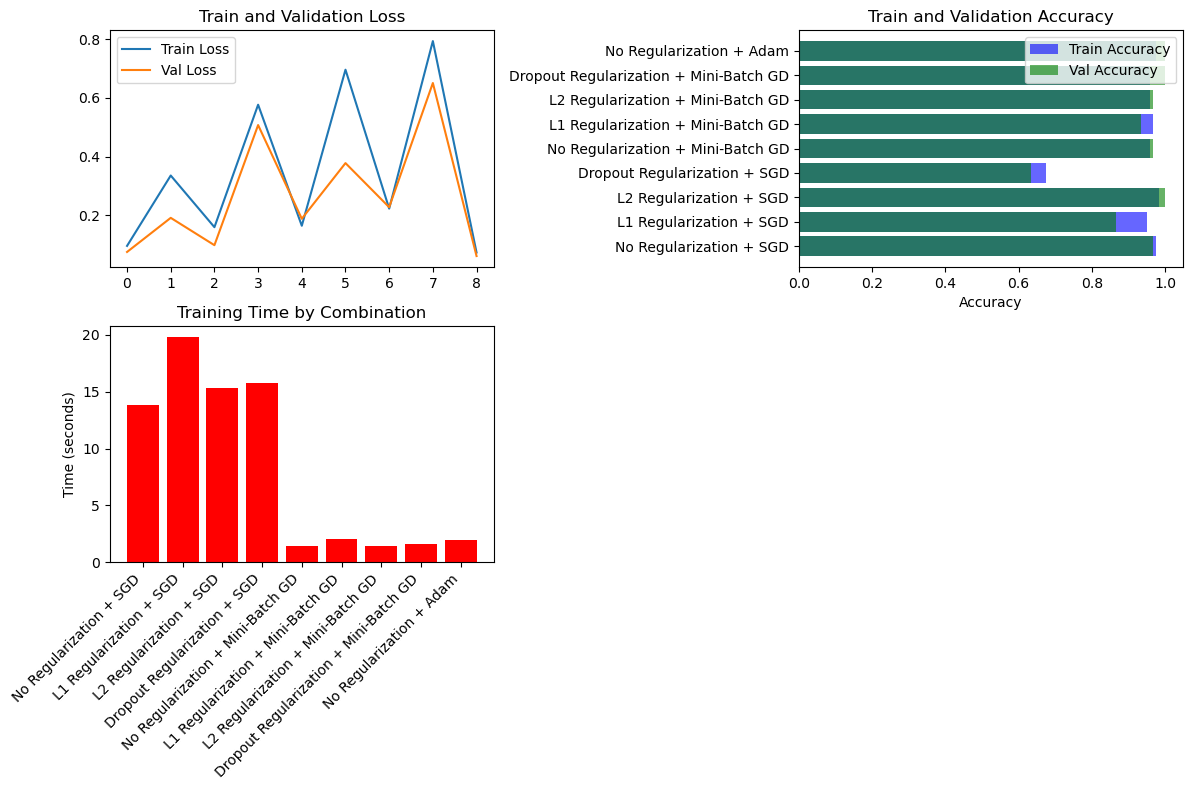

In [14]:
# Función para calcular la precisión
def calculate_accuracy(model, X, y):
    model.eval()
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs, 1)
        accuracy = accuracy_score(y.numpy(), predicted.numpy())
    return accuracy

# Función de entrenamiento con regularización
def train_model_with_regularization(model, criterion, optimizer, X_train, y_train, X_val, y_val, num_epochs=100, l1_lambda=0.0, batch_size=None):
    train_losses = []
    val_losses = []
    train_times = []

    # Crear el dataset
    dataset = torch.utils.data.TensorDataset(X_train, y_train)

    # Si no se especifica batch_size, se asume Batch Gradient Descent
    if batch_size is None:
        batch_size = len(dataset)  # Batch Gradient Descent

    # Crear el dataloader
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        model.train()
        
        epoch_loss = 0
        for batch_X, batch_y in dataloader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            
            # Aplicar L1 regularización manualmente si se especifica
            if l1_lambda > 0:
                l1_loss = 0
                for param in model.parameters():
                    l1_loss += torch.sum(torch.abs(param))
                loss += l1_lambda * l1_loss
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        
        epoch_train_time = time.time() - epoch_start_time
        train_times.append(epoch_train_time)

        avg_epoch_loss = epoch_loss / len(dataloader)
        train_losses.append(avg_epoch_loss)

        # Validación
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            val_losses.append(val_loss.item())

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], '
                  f'Train Loss: {avg_epoch_loss:.4f}, '
                  f'Validation Loss: {val_loss.item():.4f}, '
                  f'Time: {epoch_train_time:.4f} seconds')

    return train_losses, val_losses, train_times

# Diferentes configuraciones para las combinaciones
combinations = [
    {'reg': 'No Regularization', 'opt': 'SGD'},
    {'reg': 'L1 Regularization', 'opt': 'SGD'},
    {'reg': 'L2 Regularization', 'opt': 'SGD'},
    {'reg': 'Dropout Regularization', 'opt': 'SGD'},
    {'reg': 'No Regularization', 'opt': 'Mini-Batch GD'},
    {'reg': 'L1 Regularization', 'opt': 'Mini-Batch GD'},
    {'reg': 'L2 Regularization', 'opt': 'Mini-Batch GD'},
    {'reg': 'Dropout Regularization', 'opt': 'Mini-Batch GD'},
    {'reg': 'No Regularization', 'opt': 'Adam'},
]

# Registrar métricas
metrics = {
    'combination': [],
    'train_loss': [],
    'val_loss': [],
    'train_accuracy': [],
    'val_accuracy': [],
    'train_time': []
}

# Entrenar el modelo para cada combinación
for combo in combinations:
    print(f"\nEntrenando con {combo['reg']} y {combo['opt']}")

    # Establecer las técnicas de regularización
    if combo['reg'] == 'No Regularization':
        model = IrisNetWithDropout(dropout_rate=0.0)
        l1_lambda = 0.0
        weight_decay = 0.0
    elif combo['reg'] == 'L1 Regularization':
        model = IrisNetWithDropout(dropout_rate=0.0)
        l1_lambda = 0.01
        weight_decay = 0.0
    elif combo['reg'] == 'L2 Regularization':
        model = IrisNetWithDropout(dropout_rate=0.0)
        l1_lambda = 0.0
        weight_decay = 0.01
    elif combo['reg'] == 'Dropout Regularization':
        model = IrisNetWithDropout(dropout_rate=0.5)
        l1_lambda = 0.0
        weight_decay = 0.0
    
    # Establecer el optimizador
    if combo['opt'] == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=weight_decay)
        batch_size = 1
    elif combo['opt'] == 'Mini-Batch GD':
        optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=weight_decay)
        batch_size = 16
    elif combo['opt'] == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=weight_decay)
        batch_size = 16

    # Entrenar el modelo
    train_losses, val_losses, train_times = train_model_with_regularization(
        model, nn.CrossEntropyLoss(), optimizer, X_train, y_train, X_val, y_val,
        num_epochs=100, l1_lambda=l1_lambda, batch_size=batch_size
    )
    
    # Calcular precisión
    train_accuracy = calculate_accuracy(model, X_train, y_train)
    val_accuracy = calculate_accuracy(model, X_val, y_val)
    
    # Registrar métricas
    metrics['combination'].append(f"{combo['reg']} + {combo['opt']}")
    metrics['train_loss'].append(train_losses[-1])
    metrics['val_loss'].append(val_losses[-1])
    metrics['train_accuracy'].append(train_accuracy)
    metrics['val_accuracy'].append(val_accuracy)
    metrics['train_time'].append(sum(train_times))

# Convertir métricas a DataFrame para facilitar el análisis
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Gráfico de pérdidas de entrenamiento y validación
plt.subplot(2, 2, 1)
plt.plot(metrics_df['train_loss'], label='Train Loss')
plt.plot(metrics_df['val_loss'], label='Val Loss')
plt.title('Train and Validation Loss')
plt.legend()

# Gráfico de precisión de entrenamiento y validación
plt.subplot(2, 2, 2)
plt.barh(metrics_df['combination'], metrics_df['train_accuracy'], color='blue', alpha=0.6, label='Train Accuracy')
plt.barh(metrics_df['combination'], metrics_df['val_accuracy'], color='green', alpha=0.6, label='Val Accuracy')
plt.xlabel('Accuracy')
plt.title('Train and Validation Accuracy')
plt.legend()

# Gráfico de tiempos de entrenamiento
plt.subplot(2, 2, 3)
plt.bar(metrics_df['combination'], metrics_df['train_time'], color='red')
plt.ylabel('Time (seconds)')
plt.title('Training Time by Combination')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Task 7 - Discusión
Discuta los resultados obtenidos de diferentes modelos. Compare la velocidad de convergencia y el rendimiento final de modelos utilizando diferentes funciones de pérdida, técnicas de regularización, y algoritmos de optimización. Explore y discuta por qué ciertas técnicas podrían conducir a un mejor rendimiento tanto técnicas de regularización, funciones de pérdida como algoritmos de optimización

**R:** Los algoritmos de optimización basados en SGD suelen tener tiempos de entrenamiento más largos en comparación con Adam y Mini-Batch GS, lo cual se debe a que las actualizaciones de los pesos que realiza SGD después de cada muestra hacen que el algoritmo sea más lento. Al tener un tiempo de entrenamiento más corto, Adam suele converger más rápidamente, pues este adapta laas tasas de aprendizaje para cada parámetro, lo que hace que tenga una optimización más rápida y que sea eficiente para manejar grandes volúmenes de datos y que pueda ajustarse mejor a las gradientes.

Al hablar de eficiencia, Adam sobresale sobre otros modelos, pero es importante notar que a pesar de que se reduce el tiempo de entrenamiento, no es el modelo que garantizael la mejor precisión, sin embargo puede beneficiarse de técnicas de regularización. Mini-Batch GD es un modelo que ofrece un buen compromiso entre SGD y Batch GS completo, pues proporciona tiempos de convergencia máas rápidos que SGD y resultados de precisión robustos, especialmente cuando se le aplican técnicas de regularización como L2 o Dropout.

En términos de precisión y pérdida, la regularización L2 y el Dropout en combinaión con Mini-batch GD y SGD muestran la mayor precisión de validación. Específicamente L2 Regularization agrega una penalización por pesos grandes, lo que evita que el modelo se sobreajuste a los datos de entrenamiento y orilla al modelo a mejorar su generalización, resultando en un rendimiento consistente entre el entranmiento y la validación.

Por su parte, el Dropout ayuda a evitar que la red dependa de algunas neuronas, haciendo que el modelo aprenda representaciones más robustas y mejorando la capacidad del modelo para generalizar cuando se le presentan nuevos datos. En el caso del SGD sin regularización se tiende a tener un sobreajuste del modelo, lo cual genera una mejor precisión durante el entrenamiento en comparación con la data de validación, lo cual hace mucho más evidente la necesidad de aplicar técnicas de regularización para evitar que los modelos se sobreajusten.

En comparación a L2 y al Dropout, L1 Regularization no muestra un rendimiento tan robusto, lo cual puede justificarse como que esta técnica tiende a forzar algunos pesos a ser exactamente cero, lo cual puede no ser tan efectivo al hacer generalizaciones. En cambio, L2 regularization ofrece un mejor equilibrio entre la precisión del modelo y la prevención del overfitting.

## Ejercicio 2 - Repaso Teoría
1. ¿Cuál es la principal innovación de la arquitectura Transformer?

El uso exclusivo de mecanismos de atención, especialmente los de auto-atención, pues evita el uso de arquitecturas dependientes de redes neuronales recurrentes o convolucionales, pues Transformer utiliza atención para considerar la influencia de todos los elementos de una secuencia simmultáneamente.

Algunos puntos clave de esta arquitectura es que el self-attention, o auto-atención permite que cada palabra de una secuencia preste atención a todas las demás palabras, como se mencionaba anteriormente, lo que permite modelar relaciones contextuales complejas en secuencias de datos, capturando dependencias a largo plazo de manera directa y eficiente. En este modelo también se usa la paralelización al eliminar la dependencia secuencial que se genera a raíz de las RNN's, reduciendo, por ende, el tiempo de entrenamiento y aumentando la cantidad de datos con los que se puede trabajar de manera eficiente.

2. ¿Cómo funciona el mecanismo de atención del scaled dot-product?
Este es uno de los componentes clave en la arquitectura Transformer, el cual permite que el modelo determine a qué partes de una secuencia se debe prestar más atención cuando se procesa cada elemento de la secuencia.

Este mecanismo tiene tres inputs, los queries, Q, son las consultas que se utilizan para buscar información relevante. Las Keys, K, que son claves contra las que se comparan las consultas; y los Values, V, que son valores que contienen la información qeu queremos recuperar. Los tres inputs son matrices derivadas de la entrada original de dimensiones n * d_q, n * d_k y n * d_v, respectivamente, donde n es la longitud de una secuencia.

Se debe calcular una matriz de similitud, la cual indica cuán alineado está cada elemento de la secuencia con respecto a todos los demás, lo cual se realiza calculando el producto punto entre cada query y todas las claves, produciendo una matriz de n * n donde cada elemento representa la similitud entre un query y una key.

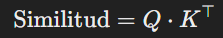

El escalado es un cálculo que se aplica para evitar que los valores de la matriz de similitud se vuelvan muy grandes y se produzcan gradientes inestables, por lo que para escalar los resultados se divide la raíz cuadrada de la dimensión de las claves d_k.

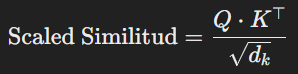

Luego se aplica una función softmax a la matriz escalada de similitud para convertir los valores en una distribución de probabilidad la cual indica la importancia relativa de cada palabra con respecto al query, lo cual asegura que los pesos de atención sumen 1 en cada fila.

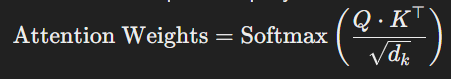

Por último, los pesos de atención se utilizan para hacer una combinación ponderada de los valores V, lo cual produce una nueva representación de la secuencia, en donde cada elemento de la secuencia original ha sido ajustado a la importancia relativa del resto de elementos.

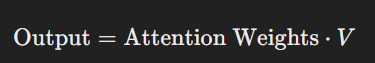

3. ¿Por qué se utiliza la atención de múltiples cabezales en Transformer?
4. ¿Cómo se incorporan los positional encodings en el modelo Transformer?
5. ¿Cuáles son algunas aplicaciones de la arquitectura Transformer más allá de la machine translation?